# PCA
I want to quantify how important a variable is to our dataset as a whole. To do this, I am assuming a close proximity for the cyclone to be "Wind speed of gust" as that is obviously highly indicative of the total cyclone. 

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [28]:
PATH = "../data/1991TS"
# WIND SPEED OF GUST
FG = "fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.4p4km.nc"

fg = nc.Dataset(f"{PATH}/{FG}")


FILENAME = 'tas.T1Hmean.UMRA2T.19910428_19910501.BOB01.4p4km.nc'

latitude = fg.variables["latitude"][:]
longitude = fg.variables["longitude"][:]
wind_speed = fg.variables["wind_speed_of_gust"][:][0][0]


fn = f"{PATH}/{FILENAME}"
tas = nc.Dataset(fn)

air_temp = tas.variables["air_temperature"][:][0][0]

prlst = nc.Dataset(f"{PATH}/prlst.T1Hmean.UMRA2T.19910428_19910501.BOB01.4p4km.nc")
rainfall = prlst.variables["stratiform_rainfall_amount"][:][0][0]

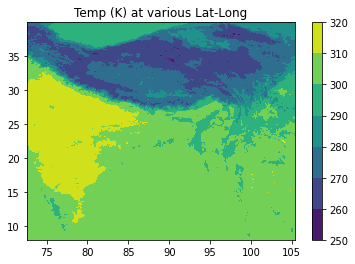

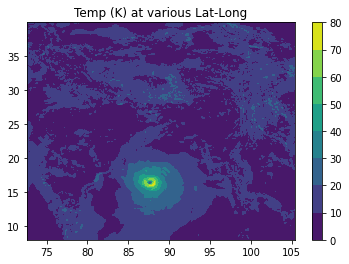

In [4]:
fig, ax = plt.subplots()
cntr = ax.contourf(longitude, latitude, air_temp)

fig.colorbar(cntr, ax=ax)
ax.set_title("Temp (K) at various Lat-Long")
plt.show()


fig, ax = plt.subplots()
cntr = ax.contourf(longitude, latitude, wind_speed)

fig.colorbar(cntr, ax=ax)
ax.set_title("Temp (K) at various Lat-Long")
plt.show()

In [29]:
data = np.array([air_temp.flatten(), wind_speed.flatten(), rainfall.flatten()])
data.shape

(3, 639900)

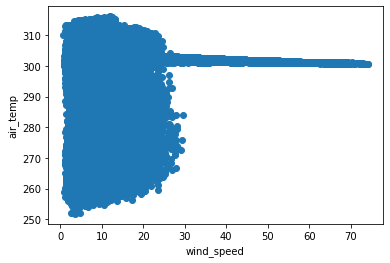

In [17]:
fig, ax = plt.subplots()

ax.scatter(wind_speed, air_temp)

ax.set_xlabel("wind_speed")
ax.set_ylabel("air_temp")

plt.show()

In [34]:
pca = PCA(n_components=3)
cyclone_pca = pca.fit(data.T)


In [35]:
cyclone_pca.explained_variance_ratio_


array([0.87919799, 0.1104625 , 0.01033951])

IndexError: index 3 is out of bounds for axis 1 with size 3

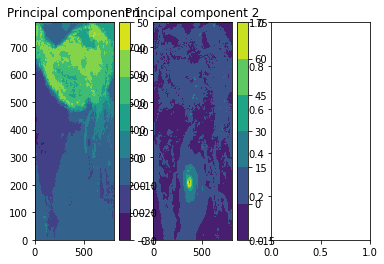

In [37]:
fit_pca = pca.fit_transform(data.T)
f1, (ax1,ax2, ax3) = plt.subplots(1,3)
cntr = ax1.contourf(fit_pca[:, 0].reshape((790, 810)))
f1.colorbar(cntr, ax=ax1)
ax1.set_title("Principal component 1")
cntr = ax2.contourf(fit_pca[:, 1].reshape((790, 810)))
f1.colorbar(cntr, ax=ax2)
ax2.set_title("Principal component 2")
cntr = ax3.contourf(fit_pca[:, 3].reshape((790, 810)))
f1.colorbar(cntr, ax=ax3)
ax3.set_title("Principal component 3")